# Numpy
--- 

##  Summing the Values in an Array

In [1]:
# ! pip install numpy
import numpy as np  # import numpy lib

In [25]:
L = np.random.random(100)
%timeit sum(L)  # built-in
%timeit np.sum(L)  # np sum func

12.7 µs ± 706 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.39 µs ± 234 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


##  Minimum and Maximum
- min( ) vs  np.min( )
- max( ) vs  np.max( )

In [28]:
big_array = np.random.rand(1000000)
np.min(big_array), np.max(big_array)
min(big_array), max(big_array)

(1.6216805380775412e-06, 0.9999996276598256)

In [29]:
%timeit min(big_array) 
%timeit np.min(big_array)

72.3 ms ± 2.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.13 ms ± 44.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


np is **64x** faster built-in fountion

##  Multidimensional aggregates
- Entire array
- Row
- Column
  

In [42]:
M = np.random.randint(low=100,size=(3,4))
M

array([[82, 70, 48,  2],
       [45, 66, 78,  1],
       [17, 24, 37, 27]])

In [44]:
# entire array
print(M.sum())
print(M.max(axis=0)) # col  
print(M.min(axis=1)) #  row

497
[82 70 78 27]
[ 2  1 17]


**Other Aggregation functions available in NumPy** 

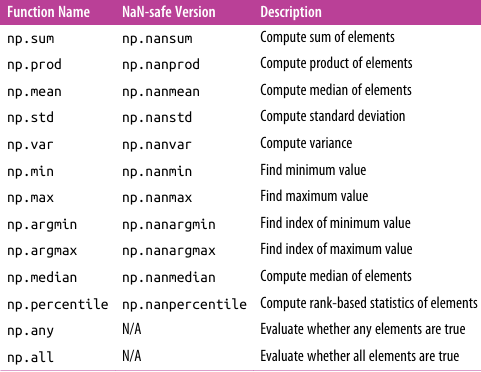

u can access with universal index with **narray.flat**

make Multidimensional array 1D with **Flat**

In [167]:
M

array([[82, 70, 48,  2],
       [45, 66, 78,  1],
       [17, 24, 37, 27]])

In [166]:
M.flat[np.argmin(M)]

1

In [145]:
M.flat[:]
min_num = M.flat[np.argmin(M)]
max_num = M.flat[np.argmax(M)]
print(f"Max= {max_num} \nMin= {min_num}")

Max= 82 
Min= 1


### broadcasting

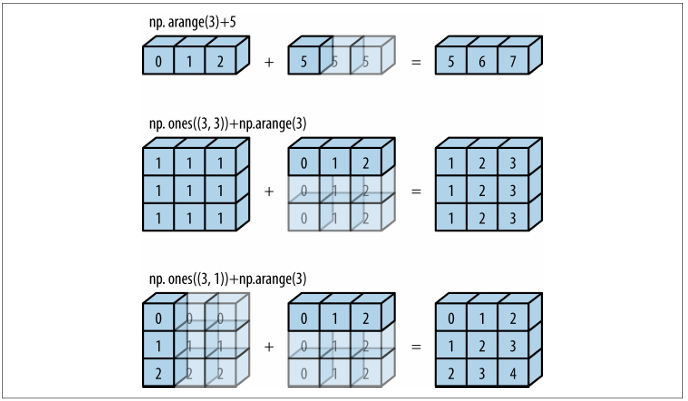

In [6]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [7]:
# ex 
a = np.arange(1,4)
print(a+5)

[6 7 8]


In [14]:
m = np.ones((3,3))
print("m\n",m,'\n')

print("m*a\n",m*a)

m
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

m*a
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [20]:
row = np.arange(3)
col = np.arange(3).reshape(3,1)
row+col

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Rules of Broadcasting

 • Rule 1: If the two arrays differ in their number of dimensions, the shape of the
 one with fewer dimensions is padded with ones on its leading (left) side.

 • Rule 2: If the shape of the two arrays does not match in any dimension, the array
 with shape equal to 1 in that dimension is stretched to match the other shape.
 
 • Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is
 raised.

 **Broadcasting example 1**

In [44]:
M = np.ones((2, 3))
a = np.arange(3)
print(M,'|',a )
print(M.shape ,a.shape )

[[1. 1. 1.]
 [1. 1. 1.]] | [0 1 2]
(2, 3) (3,)


In [42]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [48]:
# same as 
a2 = np.array([a,a])
print(a2)
M + a2

[[0 1 2]
 [0 1 2]]


array([[1., 2., 3.],
       [1., 2., 3.]])

**Broadcasting example 2**

In [50]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a,'|',b)

[[0]
 [1]
 [2]] | [0 1 2]


 a.shape -> (3, 1)  ->    a.shape -> (3, 3)         
 b.shape -> (1, 3)  ->    b.shape -> (3, 3)            


In [51]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

**Broadcasting example 3**

M.shape = (3, 2) ->   M.shape -> (3, 2)  ->  M.shape -> (3, 2)    
a.shape = (3,)   ->   a.shape -> (1, 3)  ->  a.shape -> (3, 3)

In [52]:
M = np.ones((3, 2))
a = np.arange(3)

In [53]:
M+a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

---

### Broadcasting in Practice

####  Centering an array


In [3]:
X = np.random.random((10, 3))
X

array([[0.964091  , 0.37738026, 0.50921069],
       [0.80912943, 0.70989626, 0.91292533],
       [0.99198026, 0.23050315, 0.90759591],
       [0.0276528 , 0.89997422, 0.79278025],
       [0.6435446 , 0.66517709, 0.30691291],
       [0.55779294, 0.95828142, 0.67770394],
       [0.71793191, 0.34503533, 0.90860398],
       [0.09880321, 0.78123013, 0.65709783],
       [0.84726641, 0.55429005, 0.58519852],
       [0.30878258, 0.4724674 , 0.2257329 ]])

In [46]:
Xmean = X.mean(0)
X_centered = X - Xmean

print(Xmean)
print(X_centered.mean(0))
X_centered


[0.59669751 0.59942353 0.64837623]
[ 5.55111512e-17 -2.22044605e-17  0.00000000e+00]


array([[ 0.36739349, -0.22204327, -0.13916553],
       [ 0.21243191,  0.11047273,  0.2645491 ],
       [ 0.39528274, -0.36892038,  0.25921968],
       [-0.56904471,  0.30055069,  0.14440402],
       [ 0.04684709,  0.06575356, -0.34146331],
       [-0.03890457,  0.35885789,  0.02932771],
       [ 0.1212344 , -0.2543882 ,  0.26022776],
       [-0.4978943 ,  0.18180659,  0.0087216 ],
       [ 0.25056889, -0.04513348, -0.0631777 ],
       [-0.28791493, -0.12695613, -0.42264332]])

####  Plotting a two-dimensional function

In [58]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + x * y ) + np.cos(x)

In [63]:
print(z)

[[ 0.16092847  0.15572682  0.14017611 ...  0.21003721  0.18642261
   0.10201098]
 [ 0.16092847  0.16143673  0.15168627 ...  0.56425593  0.54977402
   0.47454667]
 [ 0.16092847  0.16723699  0.16355531 ...  1.0322941   1.02950334
   0.96591383]
 ...
 [ 0.16092847  0.50994554  0.96243299 ...  1.03499909  0.54300916
   0.1034858 ]
 [ 0.16092847  0.51907824  0.98325685 ...  0.56662376  0.18225479
  -0.05662514]
 [ 0.16092847  0.52826251  1.00407896 ...  0.21151203  0.02778648
   0.03739031]]


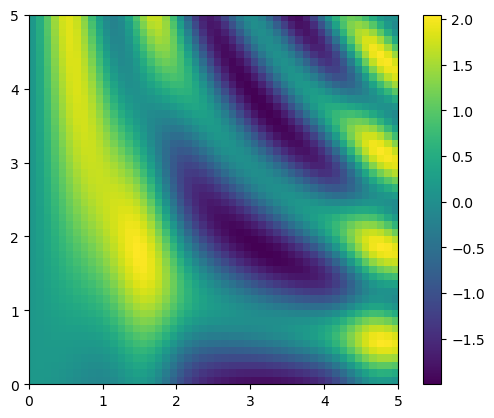

In [104]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.imshow(z , origin='lower',extent=[0,5,0,5],cmap='viridis')
plt.colorbar();
plt.show()

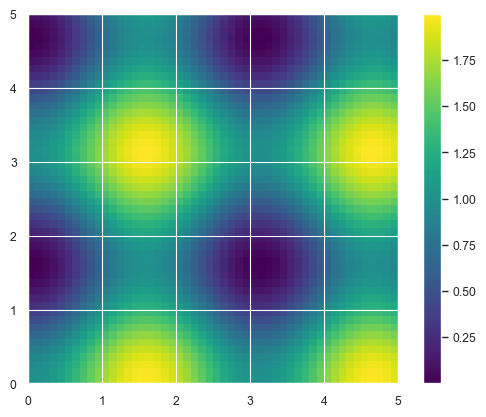

In [188]:
# let's try  cool things
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn ; seaborn.set_theme('paper')
res = (np.sin(x)**2+np.cos(y)**2) * np.ones(y.shape)
plt.imshow(res , origin='lower',extent=[0,5,0,5],cmap='viridis')
plt.colorbar();
plt.show()

In [171]:
import pandas as pd


df = pd.read_csv('../PythonDataScienceHandbook/notebooks_v1/data/Seattle2014.csv')
df.head()


,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [167]:
rainfall = df['PRCP'].values
inches = rainfall / 254

In [169]:
len(inches)

365

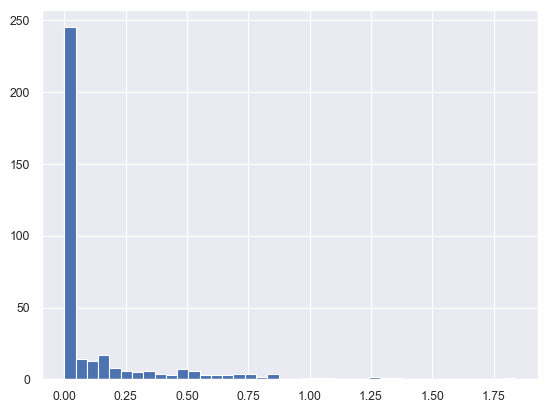

In [189]:
plt.hist(inches,40)
plt.show()

### Comparisons, Masks, and Boolean Logic

#### Example: Counting Rainy Days  
#### Comparison Operators as ufuncs  

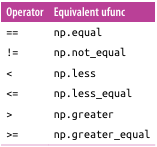


In [192]:
x = np.array([1, 2, 3, 4, 5])
print(
x < 3 ,
x > 3 ,
x <= 3,
x >= 3,
x != 3,
x == 3,sep='\n\n')

[ True  True False False False]

[False False False  True  True]

[ True  True  True False False]

[False False  True  True  True]

[ True  True False  True  True]

[False False  True False False]


In [202]:
x[[1,1,0,0,1]]

array([2, 2, 1, 1, 2])

#### Working with Boolean Arrays  


In [206]:
x = np.random.randint(10,size=(3,4))
x

array([[8, 7, 4, 2],
       [4, 2, 9, 9],
       [6, 3, 3, 2]])

In [208]:
s1,s2 = np.count_nonzero(x>5),np.sum(x>5)
print(s1,s2)

5 5


In [221]:
# quick check any , all
print(
np.all(x<10),
np.all(x>2),
np.any(x==9),
np.any(x==1),)


True False True False


In [228]:
print(np.any(x>7,axis=0),np.any(x>5,axis=1))

[ True False  True  True] [ True  True  True]


#### Boolean Arrays as Masks  

### Fancy Indexing

#### Exploring Fancy Indexing  
#### Combined Indexing  
#### Example: Selecting Random Points  
#### Modifying Values with Fancy Indexing  
#### Example: Binning Data  

### Sorting Arrays

#### Fast Sorting in NumPy: np.sort and np.argsort  
#### Partial Sorts: Partitioning  
#### Example: k-Nearest Neighbors  

### Structured Data: NumPy's Structured Arrays

#### Creating Structured Arrays  
#### More Advanced Compound Types  
#### RecordArrays: Structured Arrays with a Twist  
#### On to Pandas  